## Aula 9 - Warmup de Gráficos e Regex

### Treinando Regex

In [ ]:
import re

#### W9.1 Usando a função re.findall e a função len, encontre quantas vezes a palavra love aparece no texto a seguir.

In [ ]:
texto = """Love is a fire that burns without being seen;
It is a wound that hurts and does not feel;
It is discontented contentment;
It is pain that unravels without hurting.
It is not wanting more than wanting well;
It is a lonely walk among people;
It is never content to be content;
It is a care that you gain in losing yourself.

It is wanting to be bound by will;
It is to serve who wins the winner;
Have someone kill us, loyalty.

But how can cause your favor
In human hearts friendship,
If so contrary to itself is the same love?"""

In [ ]:
# Faça aqui
### BEGIN SOLUTION
len(re.findall('[Ll]ove', texto))
### END SOLUTION

#### W9.2 Usando a função apply e a função lambda definida abaixo, encontre o caracter que representa os valores NA na coluna IDEB12_17 no dataset do IDEB disponibilizado neste curso.

In [ ]:
#Implemente a função lambda aqui
# defina uma variavel find_na e guarde a função lambda nela
### BEGIN SOLUTION
find_na = lambda x: x if not re.search('-?[0-9]+(.|,)?[0-9]*', x) else np.nan
### END SOLUTION


In [ ]:
path_ideb = 'https://github.com/alexlopespereira/curso_ciencia_dados2020/raw/master/data/originais/ideb/ideb_municipios2017.xlsx'
df_ideb = pd.read_excel(path_ideb, skiprows=9, skipfooter=3, dtype={"IDEB12_17": "str"})

In [ ]:
df_ideb.info()

In [ ]:
# Faça aqui
# Aplicação da função lambda para encontrar os valores 
# que representam valores faltantes no seu dataset 
na_values = df_ideb['IDEB12_17'].apply(find_na)
na_values.unique()

### Tratamento de Exceção em Python

#### W9.3 Trate a exceção geradana célula a seguir de forma que a execução do programa não seja interrompida e a instrução ```print("Hello World!")``` possa ser executada apesar do erro evidente.

In [ ]:
a = 2
b = 0
c = a / b
print("Hello World!")

In [ ]:
### BEGIN SOLUTION
try:
    a = 2
    b = 0
    c = a / b
except ZeroDivisionError as e:
    print(e)
print("Hello World!")
### END SOLUTION


### Treinando Gráficos com o Seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos baseada no matplotlib

#### Considere o dataset tips

In [ ]:
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor
# Considere dataset de gorgetas a seguir
tips = sns.load_dataset("tips") 
# A lista de todos os datasets do Seaborn está aqui https://github.com/mwaskom/seaborn-data
# Mostre as primeiras linhas do dataframe tips
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### W9.4 Usando o seaborn crie um scatter plot com o dado da gorgeta (tip) no eixo y, o total da conta (total_bill) no eixo x e o dia da semana (day) representado em cores diferentes no gráfico. Para definir as cores use o parâmetro hue="day".

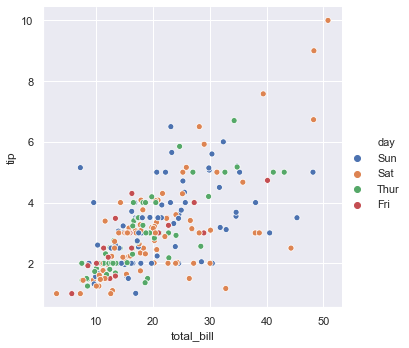

In [ ]:
# Faça aqui
sns.relplot(kind='scatter', data=tips, y='tip', x='total_bill', hue='day')

## #### W9.5 Considerando o dataset de acidentes de carros (car crashes),  usando o seaborn crie um gráfico do tipo pairplot de todas as variaveis deste dataset. Avalie se esse dataset corrobora com o bom senso de que consumo de álcool contribui com o aumento do número de acidentes. 
#### Dica: A documentação desta base de dados se encontra em https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset. A coluna total corresponde a esta descrição na documentação: "Number of drivers involved in fatal collisions per billion miles". A coluna alcohol corresponde a esta descrição na documentação: "Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired"

In [ ]:
# Considere dataset de acidentes de carros a seguir
crashes = sns.load_dataset("car_crashes") 
# Mostre as primeiras linhas do dataframe tips
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


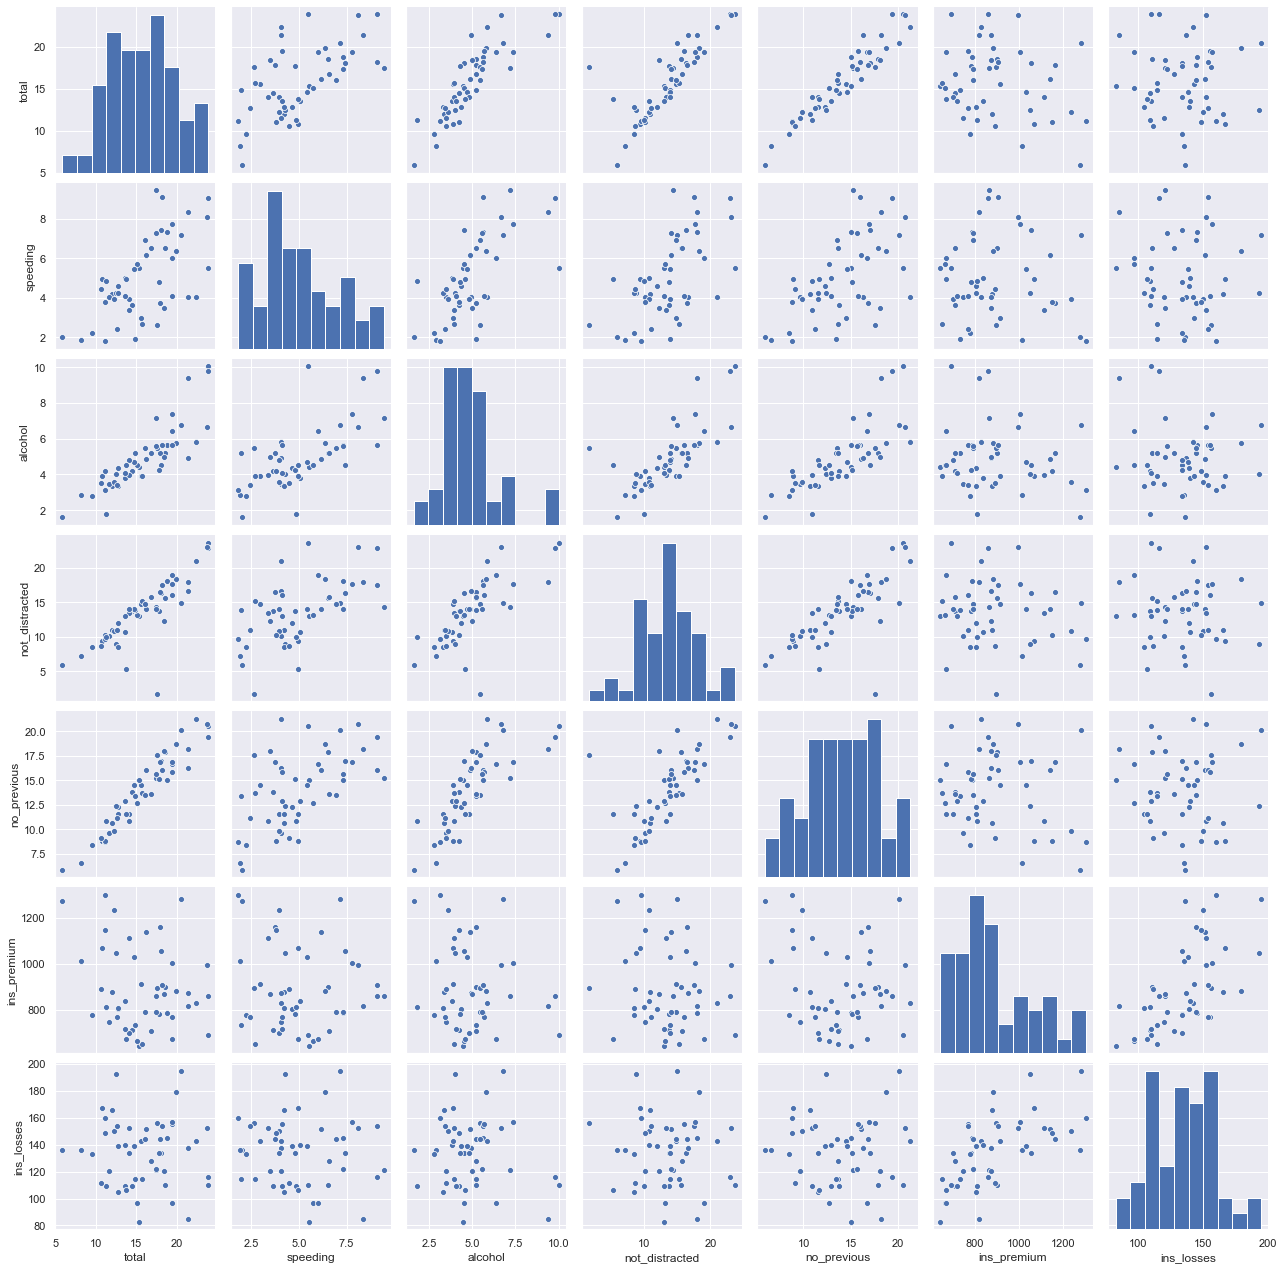

In [ ]:
# Faça aqui
sns.pairplot(crashes)

#### 9.6 Crie um gráfico de barras (uma barra para cada Estado americano no eixo x) e o tamanho vertical da barra deve corresponder ao valor da coluna ins_losses (insurance losses).
#### Dica: use o argumento aspect=3 para ter um grafico largo.

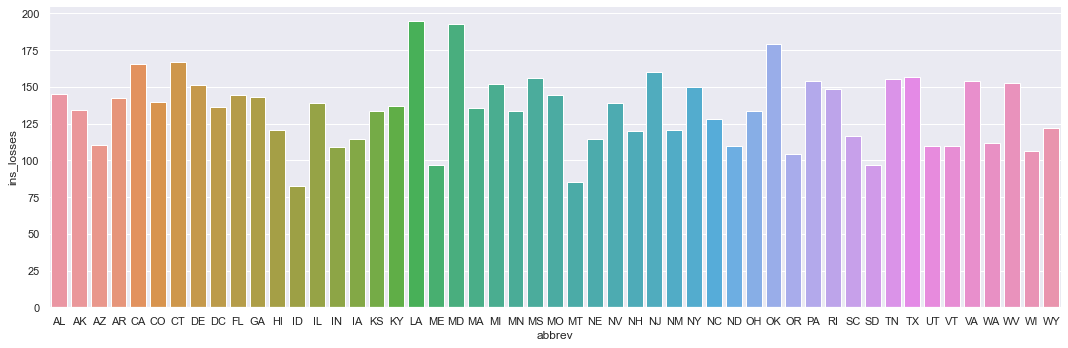

In [ ]:
# Faça aqui
sns.catplot(kind='bar', data=crashes, x='abbrev', y='ins_losses', aspect=3)